# Aplicar Modelos Discriminativos a tareas de Aprendizaje Automático

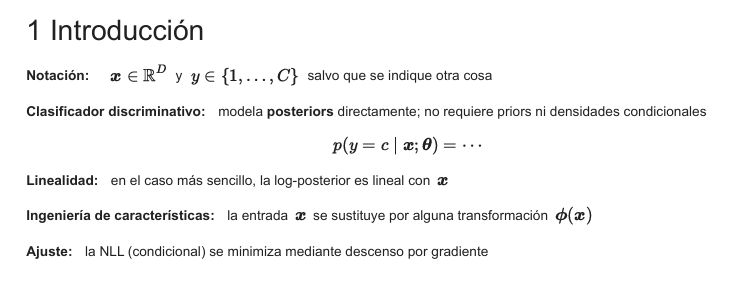

**Los modelos lineales discriminativos aprenden la frontera de decisión entre clases directamente, modelando P(y∣x) en lugar de la distribución conjunta P(x,y). Se enfocan en separar las clases sin necesidad de modelar cómo se generan los datos dentro de cada una.**

La transformación de datos ϕ(x) sirve para convertir un problema que no es linealmente separable en separable. Lo hace añadiendo a un vector de datos x más dimensiones creadas a partir de diferentes combinaciones de las que ya estaban al principio.

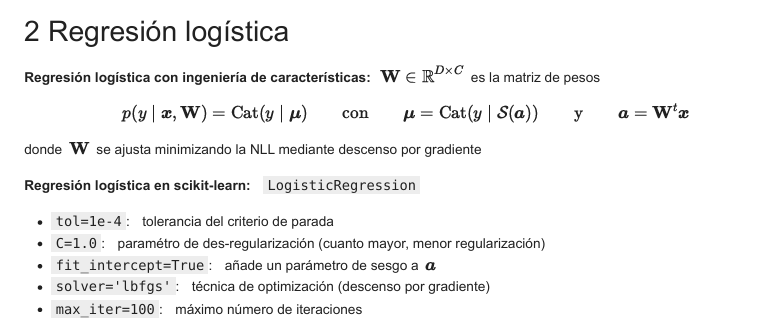

La regresión logística es un modelo para clasificar observaciones en categorías, estimando la probabilidad condicional 𝑃(𝑦∣𝑋) con una función sigmoide. Es un modelo discriminativo lineal porque se centra en la separación de clases directamente, sin modelar la distribución conjunta de las variables.

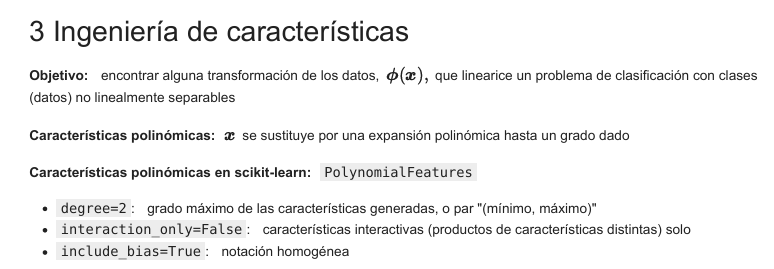

La ingeniería de características es un proceso clave en el aprendizaje automático que se centra en transformar los datos brutos en variables más útiles para los modelos predictivos. Consiste en seleccionar las características más relevantes, crear nuevas variables a partir de las existentes (como combinaciones o estadísticas), y ajustar los datos a formatos que los modelos puedan interpretar mejor, como mediante normalización, escalado o codificación de variables categóricas.

# Ejemplo de tarea no linealmente separable sin y con Ingenirería de Características

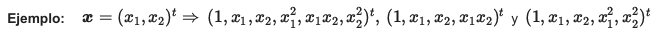

In [1]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(2, 4).astype(np.float64).reshape(-1, 2)
print(X, '=>', PolynomialFeatures(2).fit_transform(X))

[[2. 3.]] => [[1. 2. 3. 4. 6. 9.]]


In [ ]:
print(X, '=>', PolynomialFeatures(2, interaction_only=True).fit_transform(X))

[[2. 3.]] => [[1. 2. 3. 6.]]


In [ ]:
print(X, '=>', np.c_[(np.ones((X.shape[0], 1)), X, np.square(X))])

[[2. 3.]] => [[1. 2. 3. 4. 9.]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, factor=0.2, noise=0.2, random_state=23)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=23)
clf = LogisticRegression(random_state=23).fit(X_train, y_train)
acc = clf.score(X_test, y_test)
clfp = make_pipeline(StandardScaler(), PolynomialFeatures(), LogisticRegression(random_state=23))
clfp.fit(X_train, y_train)
accp = clfp.score(X_test, y_test)
print(f'Precisión: {acc:.1%}, con características polinómicas {accp:.1%}');

Precisión: 50.4%, con características polinómicas 99.2%


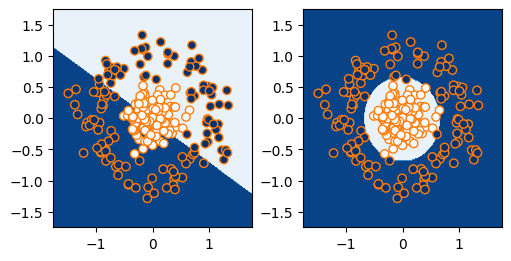

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
R = np.linspace(-1.75, 1.75, 200)
X1, X2 = np.meshgrid(R, R)
X = np.c_[np.ravel(X1), np.ravel(X2)]
fig, (ax, axp) = plt.subplots(1, 2, figsize=(5, 2.5), constrained_layout=True)
ax.contourf(X1, X2, clf.predict(X).reshape(X1.shape), 6, cmap='Blues_r')
ax.scatter(*X_test.T, c=y_test, cmap='Blues_r', edgecolors='C1')
axp.contourf(X1, X2, clfp.predict(X).reshape(X1.shape), 6, cmap='Blues_r')
axp.scatter(*X_test.T, c=y_test, cmap='Blues_r', edgecolors='C1');

# Aplicación de Ingeniería de Características a MNIST

In [ ]:
import warnings; warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, ShuffleSplit, RandomizedSearchCV
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
X, y = fetch_openml(data_id=554, return_X_y=True, as_frame=False, parser='liac-arff')
X /= 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, shuffle=False)

In [ ]:
K = 100
pca = PCA(n_components=K)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
clf = make_pipeline(PolynomialFeatures(), LogisticRegression(random_state=23))
clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)

print(f'Precisión: {acc:.1%}');

Precisión: 98.2%


# Si lo quiero graficar:

Precisión (con PCA 100 y características polinómicas): 98.3%


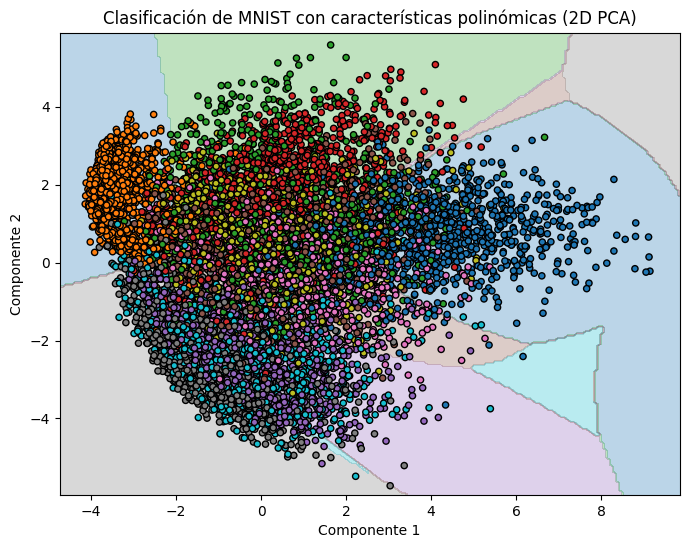

In [ ]:
import warnings; warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Cargar y normalizar el dataset MNIST
dataset = fetch_openml('mnist_784', version=1, parser='auto')
X, y = dataset.data.astype(np.float32) / 255.0, dataset.target.astype(int)

# Dividir en entrenamiento y prueba (para clasificación con PCA a 100 dimensiones)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=10000, shuffle=True, random_state=23)

# Aplicar PCA a 100 componentes para clasificación
K = 100
pca = PCA(n_components=K)
X_train = pca.fit_transform(X_train_full)
X_test_pca = pca.transform(X_test)

# Crear y entrenar el pipeline: Características polinómicas + Regresión logística
clf = make_pipeline(PolynomialFeatures(), LogisticRegression(random_state=23, max_iter=1000))
clf.fit(X_train, y_train_full)
acc = clf.score(X_test_pca, y_test)
print(f'Precisión (con PCA 100 y características polinómicas): {acc:.1%}')

# ----------------------------------------------------------------------
# Visualización: Para graficar reducimos a 2 componentes
pca2 = PCA(n_components=2)
X_train_2d = pca2.fit_transform(X_train_full)
X_test_2d = pca2.transform(X_test)

# Entrenar un pipeline similar usando los datos en 2D para visualización
clf2d = make_pipeline(PolynomialFeatures(), LogisticRegression(random_state=23, max_iter=1000))
clf2d.fit(X_train_2d, y_train_full)

# Crear malla para graficar la frontera de decisión
x_min, x_max = X_train_2d[:, 0].min() - 0.5, X_train_2d[:, 0].max() + 0.5
y_min, y_max = X_train_2d[:, 1].min() - 0.5, X_train_2d[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# Predecir etiquetas en la malla
Z = clf2d.predict(grid).reshape(xx.shape)

# Graficar la frontera de decisión y los puntos de prueba
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.tab10)
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.tab10, s=20)
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.title("Clasificación de MNIST con características polinómicas (2D PCA)")
plt.show()

# Reduciendo el número de datos de la muestra:

Precisión (con PCA 100 y características polinómicas): 98.3%


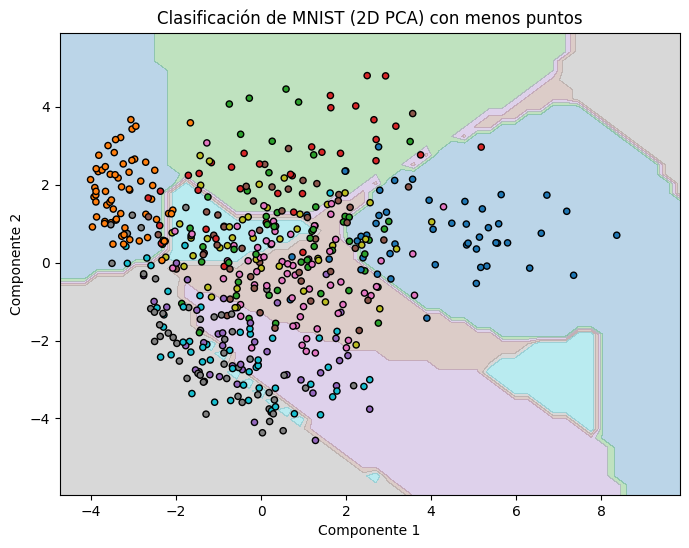

In [ ]:
import warnings; warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Cargar y normalizar el dataset MNIST
dataset = fetch_openml('mnist_784', version=1, parser='auto')
X, y = dataset.data.astype(np.float32) / 255.0, dataset.target.astype(int)

# Dividir en entrenamiento y prueba
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=10000, shuffle=True, random_state=23)

# Para clasificación usamos PCA a 100 componentes
K = 100
pca = PCA(n_components=K)
X_train = pca.fit_transform(X_train_full)
X_test_pca = pca.transform(X_test)

# Entrenar pipeline: características polinómicas + regresión logística
clf = make_pipeline(PolynomialFeatures(), LogisticRegression(random_state=23, max_iter=1000))
clf.fit(X_train, y_train_full)
acc = clf.score(X_test_pca, y_test)
print(f'Precisión (con PCA 100 y características polinómicas): {acc:.1%}')

# ----------------------------------------------------------------------
# Visualización: Reducir a 2 componentes con PCA
pca2 = PCA(n_components=2)
X_train_2d = pca2.fit_transform(X_train_full)
X_test_2d = pca2.transform(X_test)

# Entrenar pipeline en 2D
clf2d = make_pipeline(PolynomialFeatures(), LogisticRegression(random_state=23, max_iter=1000))
clf2d.fit(X_train_2d, y_train_full)

# Crear malla con menos puntos (50x50)
x_min, x_max = X_train_2d[:, 0].min() - 0.5, X_train_2d[:, 0].max() + 0.5
y_min, y_max = X_train_2d[:, 1].min() - 0.5, X_train_2d[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))
grid = np.c_[xx.ravel(), yy.ravel()]

# Predecir etiquetas en la malla
Z = clf2d.predict(grid).reshape(xx.shape)

# Opcional: Muestrear menos puntos de los datos de prueba para el scatter
sample_idx = np.random.choice(len(X_test_2d), size=500, replace=False)
X_test_sample = X_test_2d[sample_idx]
y_test_sample = np.array(y_test)[sample_idx]

# Graficar la frontera de decisión y los puntos de prueba muestreados
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.tab10)
plt.scatter(X_test_sample[:, 0], X_test_sample[:, 1], c=y_test_sample, edgecolors='k', cmap=plt.cm.tab10, s=20)
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.title("Clasificación de MNIST (2D PCA) con menos puntos")
plt.show()